In [1]:
import torch
from agent import DQN, ExponentialSchedule, train_dqn
from env import PokerEnvironment
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

In [2]:
def moving_average(data, *, window_size=50):
    """Smooths 1-D data array using a moving average.

    Args:
        data: 1-D numpy.array
        window_size: Size of the smoothing window

    Returns:
        smooth_data: A 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    if len(data) < window_size:
        return data
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel) / np.convolve(np.ones_like(data), kernel)
    return smooth_data[: -window_size + 1]

Episode: 245163 | Steps: 9 | Return:  0.00(-0.03  0.03) | Epsilon: 0.05: 100%|██████████| 1500000/1500000 [1:52:50<00:00, 221.54it/s]  


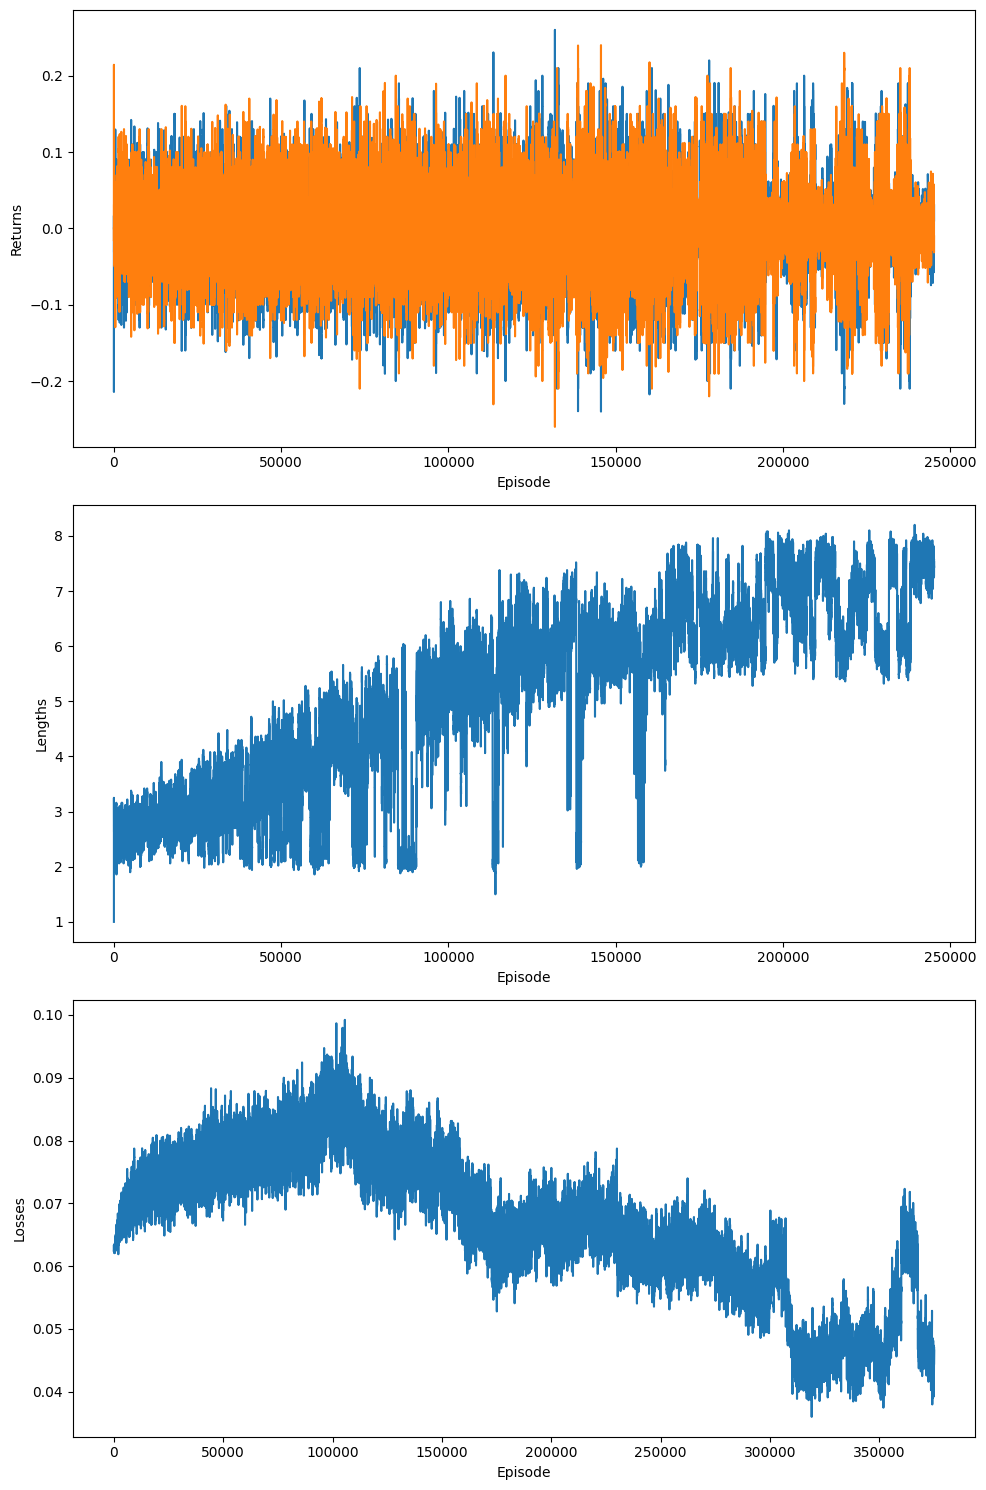

In [3]:
# try:
id_name = "bug_fix_8x512"
env = PokerEnvironment()
gamma = 0.99

# We train for many time-steps; as usual, you can decrease this during development / debugging,
# but make sure to restore it to 1_500_000 before submitting
num_steps = 1_500_000
num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 200_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.05, 1_000_000)

model_class = DQN

# This should take about 1-2 hours on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    model=model_class,
    model_num_layers=8,
    model_hidden_dim=512,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, model_class) for value in dqn_models.values())

# Saving computed models to disk, so that we can load and visualize them later
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(
    checkpoint,
    f"models/checkpoint_poker_{id_name}_{num_steps}.pt",
)
np.savez(
    f"data_backups/with_{id_name}_{num_steps}_data.npz",
    arr1=returns,
    arr2=lengths,
    arr3=losses,
)

# YOUR PLOTTING CODE HERE
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for player_returns in returns:
    axs[0].plot(moving_average(player_returns, window_size=50))
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Returns")

axs[1].plot(moving_average(lengths, window_size=50))
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Lengths")

axs[2].plot(moving_average(losses, window_size=50))
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Losses")

plt.tight_layout()
plt.savefig(f"graphs/poker_training_{id_name}_{num_steps}.png")
plt.show()
# except Exception as e:
#     print(f"FAILED: {e}")

Episode: 674709 | Steps: 10 | Return:  0.00(-0.33  0.67) | Epsilon: 0.01: 100%|██████████| 5000000/5000000 [9:25:18<00:00, 147.41it/s]   


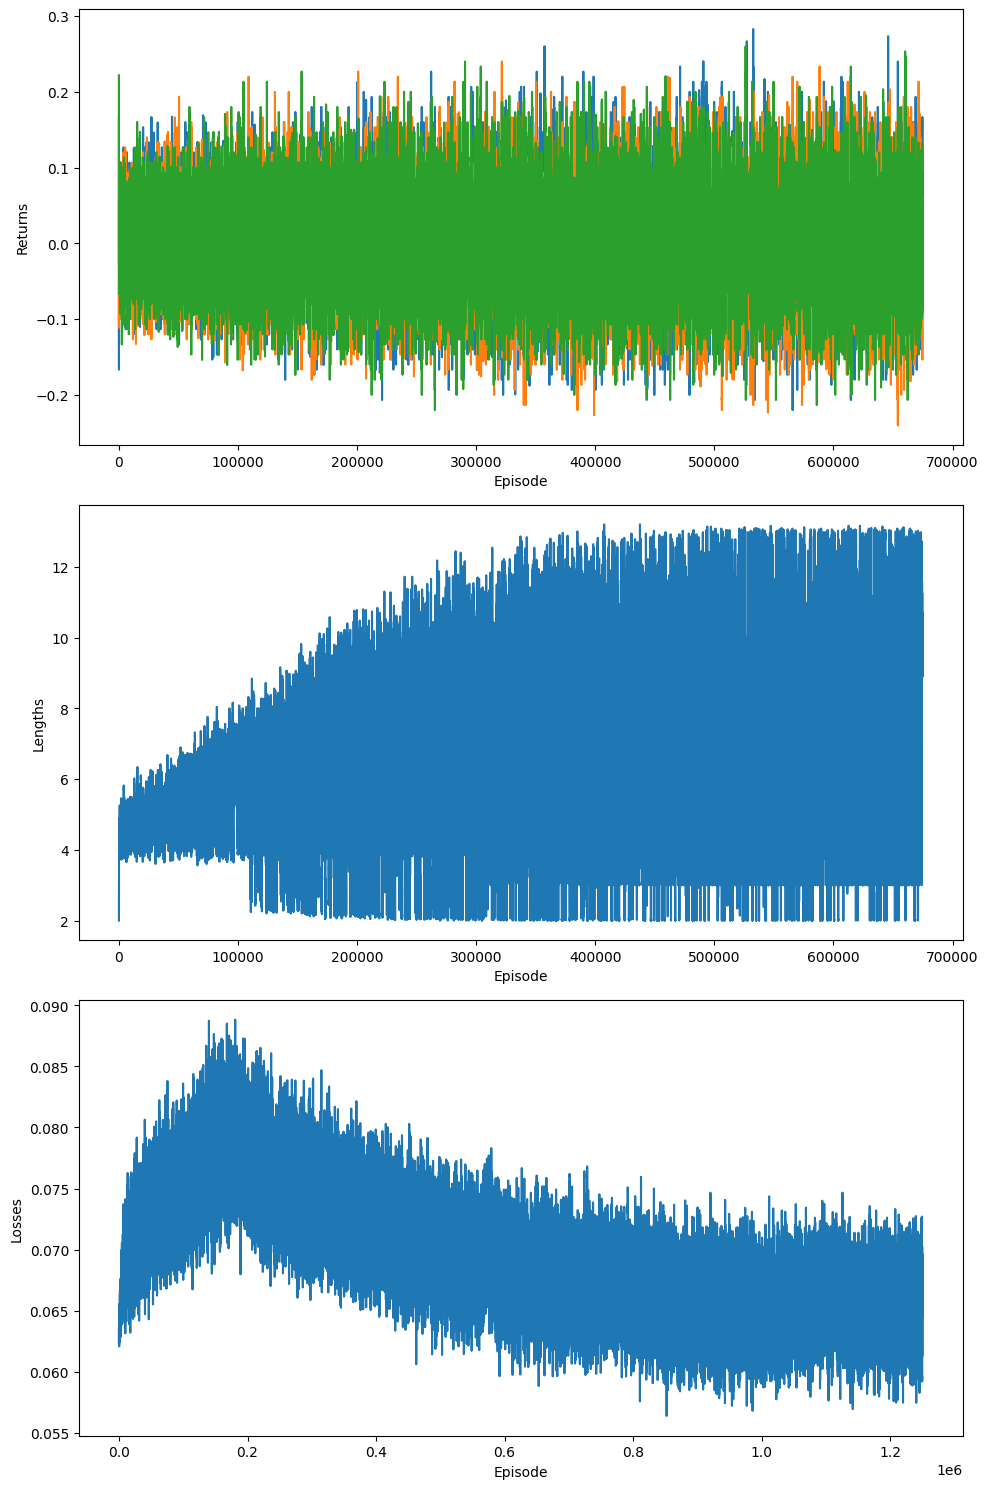

In [4]:
try:
    id_name = "more_random_3_player_16x512"
    env = PokerEnvironment(num_players=3, stash_size=25)
    gamma = 0.99

    # We train for many time-steps; as usual, you can decrease this during development / debugging,
    # but make sure to restore it to 1_500_000 before submitting
    num_steps = 5_000_000
    num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

    replay_size = 200_000
    replay_prepopulate_steps = 50_000

    batch_size = 64
    exploration = ExponentialSchedule(1.0, 0.01, 4_000_000)

    model_class = DQN

    # This should take about 1-2 hours on a generic 4-core laptop
    dqn_models, returns, lengths, losses = train_dqn(
        env,
        num_steps,
        num_saves=num_saves,
        model=model_class,
        model_num_layers=16,
        model_hidden_dim=512,
        replay_size=replay_size,
        replay_prepopulate_steps=replay_prepopulate_steps,
        batch_size=batch_size,
        exploration=exploration,
        gamma=gamma,
    )

    assert len(dqn_models) == num_saves
    assert all(isinstance(value, model_class) for value in dqn_models.values())

    # Saving computed models to disk, so that we can load and visualize them later
    checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
    torch.save(
        checkpoint,
        f"models/checkpoint_poker_{id_name}_{num_steps}.pt",
    )
    np.savez(
        f"data_backups/with_{id_name}_{num_steps}_data.npz",
        arr1=returns,
        arr2=lengths,
        arr3=losses,
    )

    # YOUR PLOTTING CODE HERE
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    for player_returns in returns:
        axs[0].plot(moving_average(player_returns, window_size=50))
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Returns")

    axs[1].plot(moving_average(lengths, window_size=50))
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Lengths")

    axs[2].plot(moving_average(losses, window_size=50))
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Losses")

    plt.tight_layout()
    plt.savefig(f"graphs/poker_training_{id_name}_{num_steps}.png")
    plt.show()
except Exception as e:
    print(f"FAILED: {e}")

In [13]:
try:
    id_name = "3_player_16x856"
    env = PokerEnvironment(num_players=3, stash_size=50)
    gamma = 1

    # We train for many time-steps; as usual, you can decrease this during development / debugging,
    # but make sure to restore it to 1_500_000 before submitting
    num_steps = 10_000_000
    num_saves = 10  # Save models at 0%, 25%, 50%, 75% and 100% of training

    replay_size = 300_000
    replay_prepopulate_steps = 80_000

    batch_size = 256
    exploration = ExponentialSchedule(1.0, 0.001, 8_000_000)

    model_class = DQN

    # This should take about 1-2 hours on a generic 4-core laptop
    dqn_models, returns, lengths, losses = train_dqn(
        env,
        num_steps,
        num_saves=num_saves,
        model=model_class,
        model_num_layers=16,
        model_hidden_dim=856,
        replay_size=replay_size,
        replay_prepopulate_steps=replay_prepopulate_steps,
        batch_size=batch_size,
        exploration=exploration,
        gamma=gamma,
    )

    assert len(dqn_models) == num_saves
    assert all(isinstance(value, model_class) for value in dqn_models.values())

    # Saving computed models to disk, so that we can load and visualize them later
    checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
    torch.save(
        checkpoint,
        f"models/checkpoint_poker_{id_name}_{num_steps}.pt",
    )
    np.savez(
        f"data_backups/with_{id_name}_{num_steps}_data.npz",
        arr1=returns,
        arr2=lengths,
        arr3=losses,
    )

    # YOUR PLOTTING CODE HERE
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    for player_returns in returns:
        axs[0].plot(moving_average(player_returns, window_size=50))
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Returns")

    axs[1].plot(moving_average(lengths, window_size=50))
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Lengths")

    axs[2].plot(moving_average(losses, window_size=50))
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Losses")

    plt.tight_layout()
    plt.savefig(f"graphs/poker_training_{id_name}_{num_steps}.png")
    plt.show()
except Exception as e:
    print(f"FAILED: {e}")

Episode: 77788 | Steps: 6 | Return:  0.00(-0.33  0.33) | Epsilon: 0.68:   5%|▍         | 454620/10000000 [53:20<18:40:08, 142.03it/s] 


KeyboardInterrupt: 

In [24]:
def moving_max(data, *, window_size=50):
    """Smooths 1-D data array using a moving max.

    Args:
        data: 1-D numpy.array
        window_size: Size of the smoothing window

    Returns:
        smooth_data: A 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    if len(data) < window_size:
        return data
    windows = np.lib.stride_tricks.sliding_window_view(
        data, window_shape=(window_size,)
    )
    pooled = np.max(windows, axis=1)
    return pooled

In [35]:
def moving_std(data, *, window_size=50):
    """Smooths 1-D data array using a moving std.

    Args:
        data: 1-D numpy.array
        window_size: Size of the smoothing window
    
    Returns:
        smooth_data: A 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    if len(data) < window_size:
        return data
    windows = np.lib.stride_tricks.sliding_window_view(
        data, window_shape=(window_size,)
    )
    pooled = np.std(windows, axis=1)
    return pooled

In [36]:
def calculate_cumulative_returns(data):
    """
    Calculate the cumulative array of returns given a 1D array of data.

    Args:
        data (numpy.ndarray): 1D array of data representing returns.

    Returns:
        numpy.ndarray: 1D array of cumulative returns.
    """
    cumulative_returns = np.cumsum(data)
    return cumulative_returns


In [114]:
# load 3 player data
data = np.load("data_backups/with_more_random_3_player_16x512_5000000_data.npz")
returns, lengths, losses = data["arr1"], data["arr2"], data["arr3"]

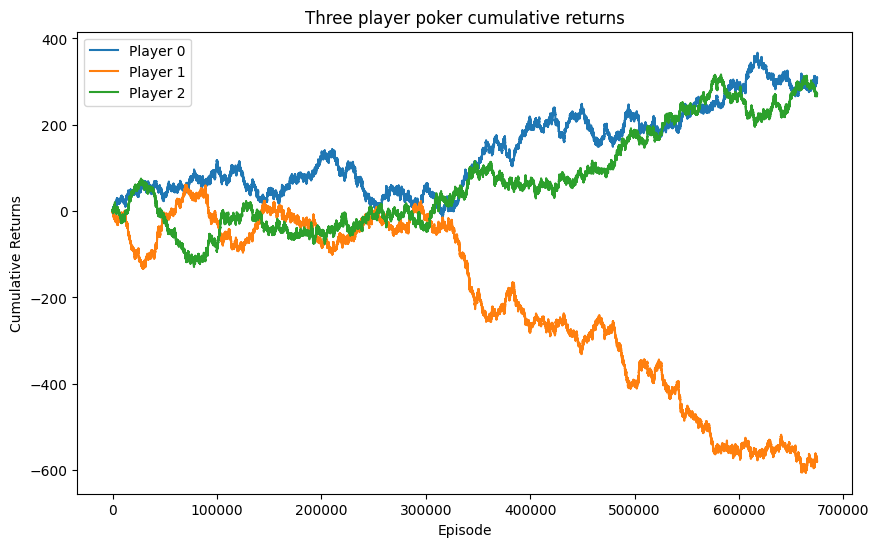

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))
for player, player_returns in enumerate(returns):
    ax.plot(calculate_cumulative_returns(player_returns), label=f"Player {player}")
ax.set_xlabel("Episode")
ax.set_ylabel("Cumulative Returns")
ax.set_title("Three player poker cumulative returns")
ax.legend()
plt.savefig("report_graphs/three_player_poker_cumulative_returns.png", dpi=400)
plt.show()

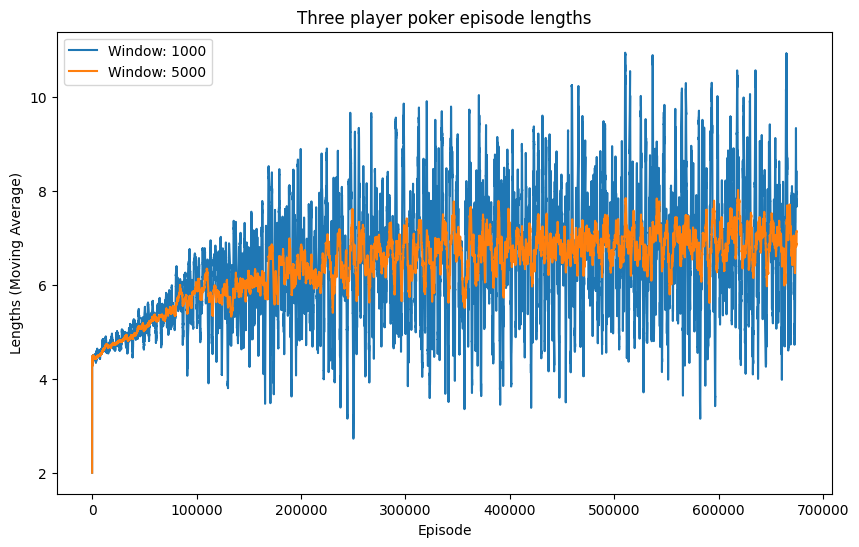

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(moving_average(lengths, window_size=1000), label="Window: 1000")
ax.plot(moving_average(lengths, window_size=5000), label="Window: 5000")
ax.set_xlabel("Episode")
ax.set_ylabel("Lengths (Moving Average)")
ax.set_title("Three player poker episode lengths")
ax.legend()

plt.savefig("report_graphs/three_player_poker_episode_lengths.png", dpi=400)
plt.show()

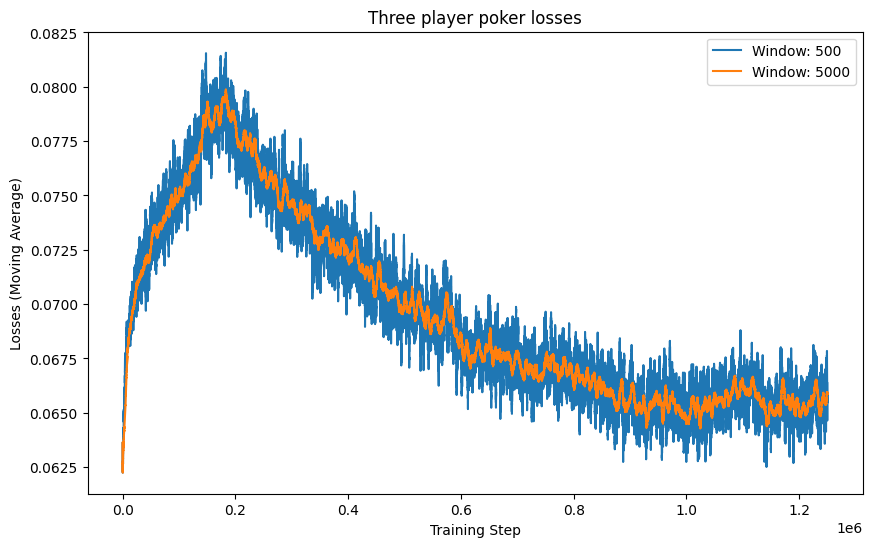

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(moving_average(losses, window_size=500), label="Window: 500")
ax.plot(moving_average(losses, window_size=5000), label="Window: 5000")

ax.set_xlabel("Training Step")
ax.set_ylabel("Losses (Moving Average)")
ax.set_title("Three player poker losses")
ax.legend()

plt.savefig("report_graphs/three_player_poker_losses.png", dpi=400)

plt.show()

In [112]:
# Load 2 player data
data = np.load("data_backups/with_bug_fix_8x512_1500000_data.npz")
returns, lengths, losses = data["arr1"], data["arr2"], data["arr3"]

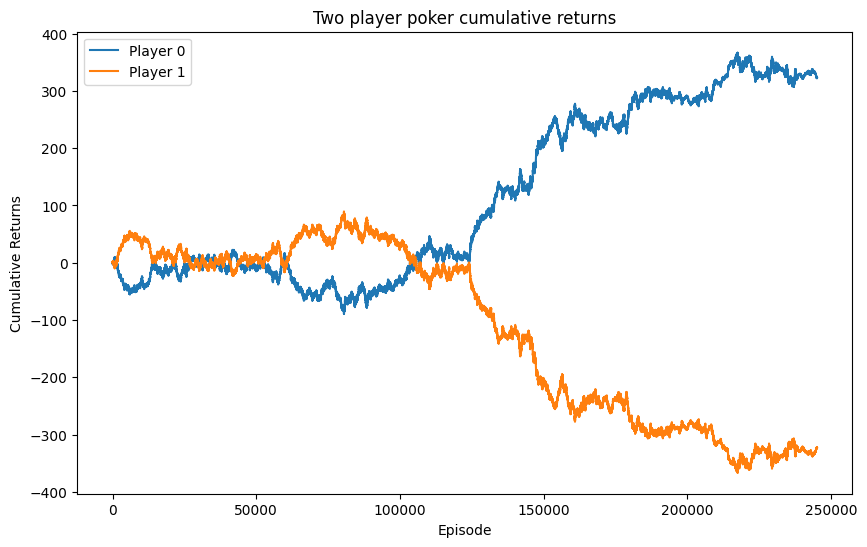

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))
for player, player_returns in enumerate(returns):
    ax.plot(calculate_cumulative_returns(player_returns), label=f"Player {player}")
ax.set_xlabel("Episode")
ax.set_ylabel("Cumulative Returns")
ax.set_title("Two player poker cumulative returns")
ax.legend()
plt.savefig("report_graphs/two_player_poker_cumulative_returns.png", dpi=400)
plt.show()

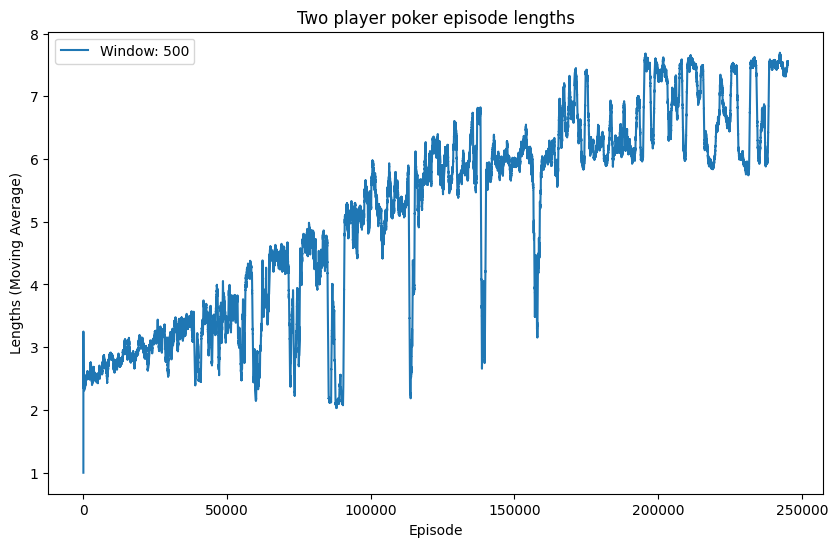

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(moving_average(lengths, window_size=500), label="Window: 500")
ax.set_xlabel("Episode")
ax.set_ylabel("Lengths (Moving Average)")
ax.set_title("Two player poker episode lengths")
ax.legend()
plt.savefig("report_graphs/two_player_poker_episode_lengths.png", dpi=400)
plt.show()

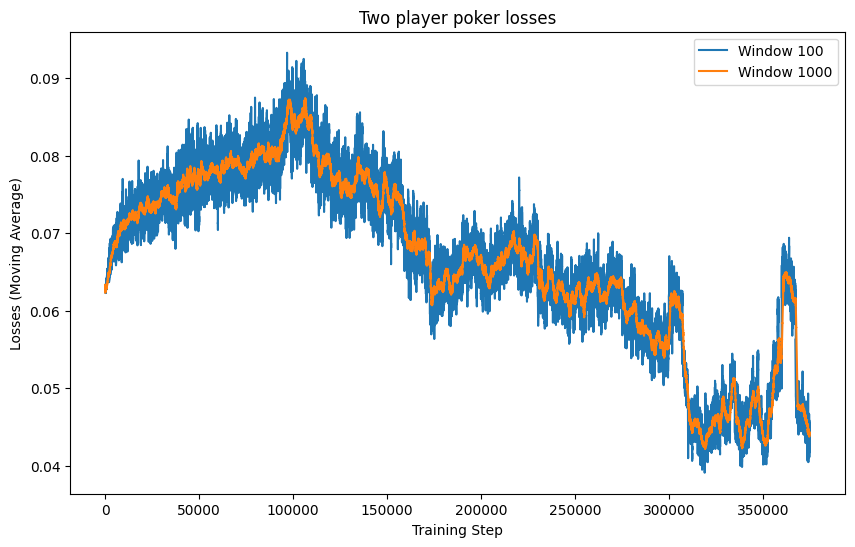

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(moving_average(losses, window_size=100), label="Window 100")
ax.plot(moving_average(losses, window_size=1000), label="Window 1000")
ax.set_xlabel("Training Step")
ax.set_ylabel("Losses (Moving Average)")
ax.set_title("Two player poker losses")

ax.legend()

plt.savefig("report_graphs/two_player_poker_losses.png", dpi=400)

plt.show()

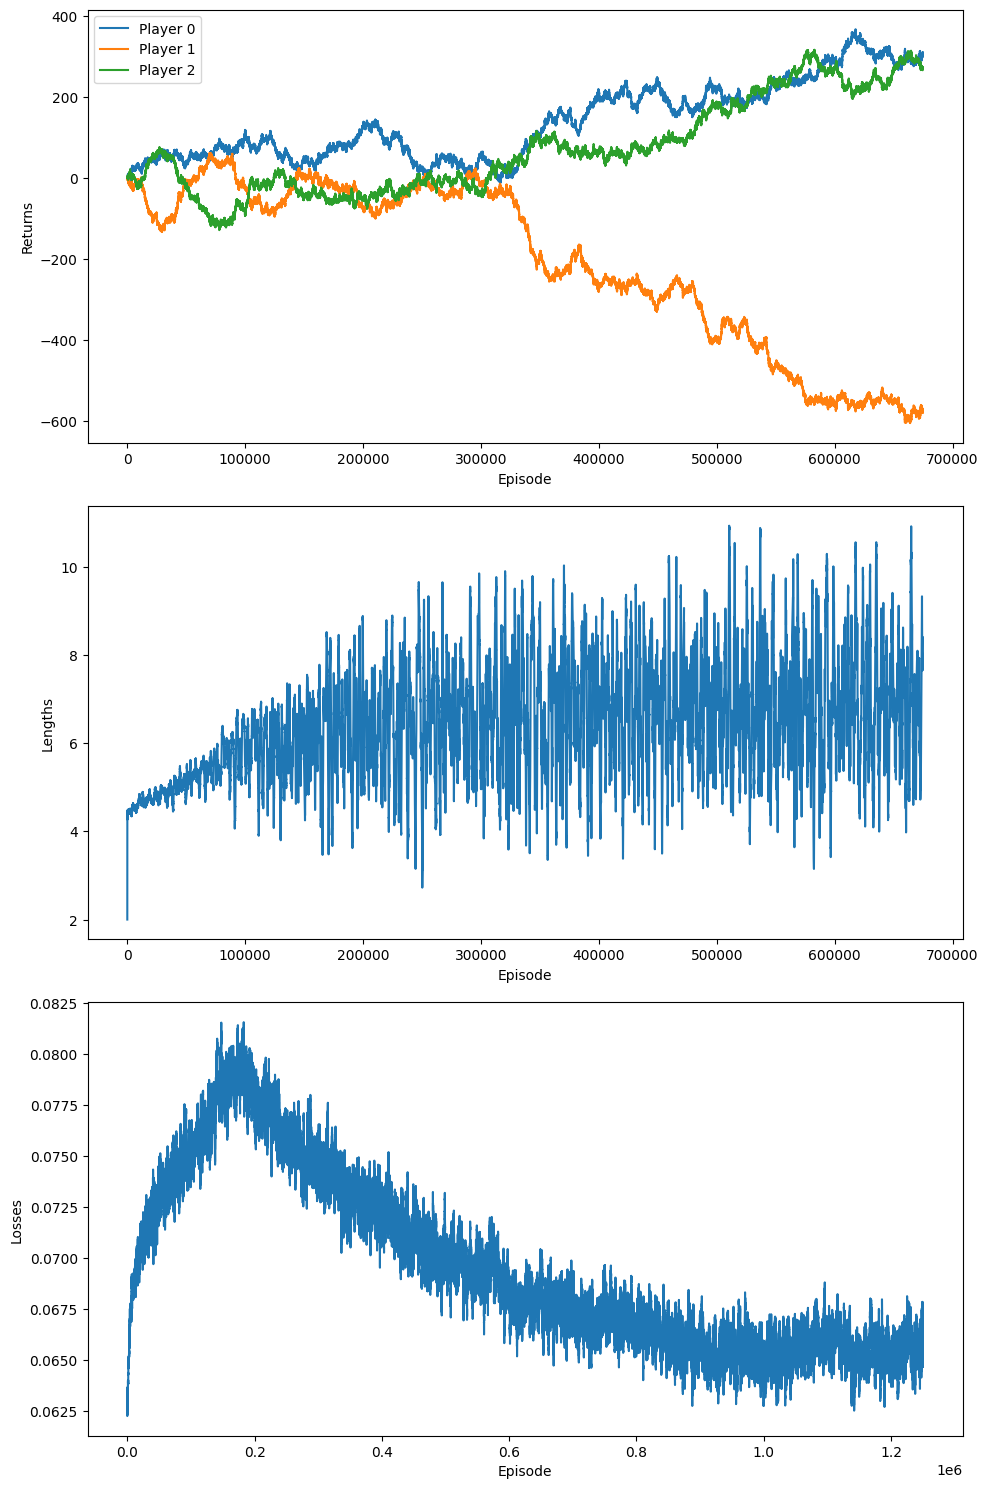

In [46]:
# YOUR PLOTTING CODE HERE
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for player, player_returns in enumerate(returns):
    axs[0].plot(calculate_cumulative_returns(player_returns), label=f"Player {player}")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Returns")
axs[0].legend()

axs[1].plot(moving_average(lengths, window_size=1000))
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Lengths")

axs[2].plot(moving_average(losses, window_size=500))
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Losses")

plt.tight_layout()
plt.show()